In [94]:
import pickle
import torch
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Analysis of the training results

## Single Agent on Starch and Glucose

First let's load the results

In [95]:
with open(f"Results/Toy-Exoenzyme-Single-agents/Toy-Exoenzyme-Single-agents_4500.pkl", 'rb') as f:
       env = pickle.load(f)

with open(f"Results/Toy-Exoenzyme-Single-agents/observations_4500.pkl", 'rb') as f:
       batch_obs = pickle.load(f)

with open(f"Results/Toy-Exoenzyme-Single-agents/actions_4500.pkl", 'rb') as f:
       batch_acts = pickle.load(f)

### Learning curve

<AxesSubplot:>

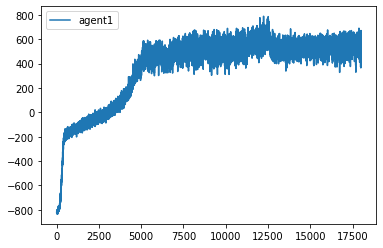

In [96]:
lc_1=pd.DataFrame(env.rewards)
lc_1.plot()

### Strategies

First let's see how the agents secrete amylase during the last training episode: Note 
that we have 4 independent workers that act randomly around the policy of the agent to collect observations and thats why we see a repetitious pattern of four in the following figure

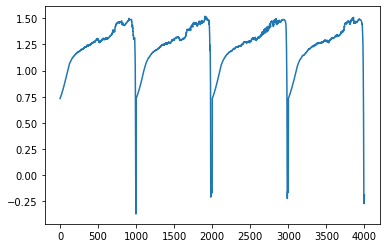

In [97]:
agent=env.agents[0]
np.random.random()
with torch.no_grad():
    plt.plot(agent.actor_network_(batch_obs[agent.name]).numpy())


Let's now explore the agent's policy in more detail

In [98]:
states=torch.rand((10000,4))
states[:,0]=states[:,0]*10
states[:,1]=states[:,1]*100
states[:,2]=states[:,2]*10
states[:,3]=300
states=torch.concat([states,agent.actor_network_(states)],dim=1)
states=states.detach().numpy()
states=pd.DataFrame(states,columns=["agent1","Glucose","Starch","Time","Amylase_Secretion"])

<AxesSubplot:>

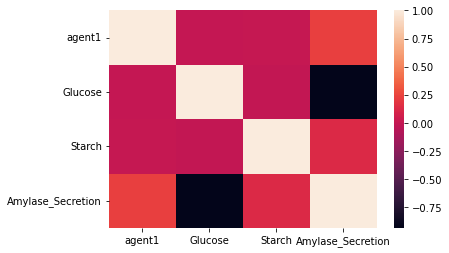

In [99]:
sns.heatmap(states[["agent1","Glucose","Starch","Amylase_Secretion"]].corr())

The trained agent learns a policy where amylase secretion is tightly regulated by glucose levels

In [100]:
fig=px.scatter_3d(states,x="Glucose",y="agent1",z="Amylase_Secretion",color="Amylase_Secretion")
fig.update_traces(marker=dict(size=2,))

Finally, Let's have a look at the concentration profiles within an episode

In [ ]:
observables=batch_obs[agent.name].detach().numpy()
observables=pd.DataFrame(observables[:,:-1],columns=["agent1","Glucose","Starch"])

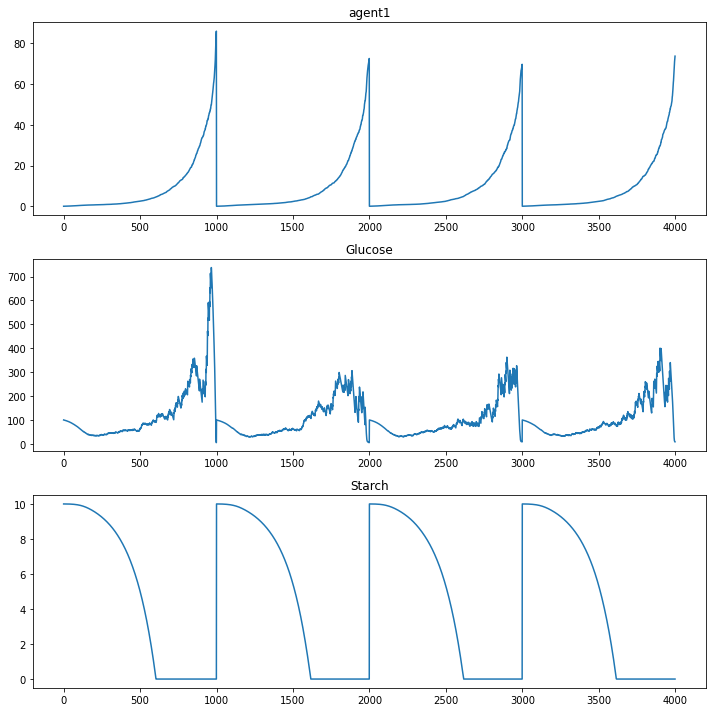

In [101]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

observables["agent1"].plot(ax=axes[0],title="agent1")
observables["Glucose"].plot(ax=axes[1],title="Glucose")
observables["Starch"].plot(ax=axes[2],title="Starch")
plt.tight_layout()

## Two Agents on Starch and Glucose

First let's load the results

In [108]:
with open(f"Results/Toy-Exoenzyme-Two-agents/Toy-Exoenzyme-Two-agents_4500.pkl", 'rb') as f:
       env = pickle.load(f)

with open(f"Results/Toy-Exoenzyme-Two-agents/observations_4500.pkl", 'rb') as f:
       batch_obs = pickle.load(f)

with open(f"Results/Toy-Exoenzyme-Two-agents/actions_4500.pkl", 'rb') as f:
       batch_acts = pickle.load(f)

## Learning Curves

<AxesSubplot:>

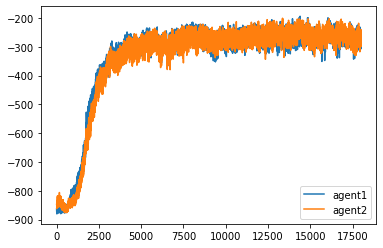

In [105]:
lc_1=pd.DataFrame(env.rewards)
lc_1.plot()

## Strategies

Simplest form of exploring the learned policies are to see amylase production during the latest episodes

<AxesSubplot:title={'center':'Amylase Secretion during an episode'}, ylabel='Amylase Secretion'>

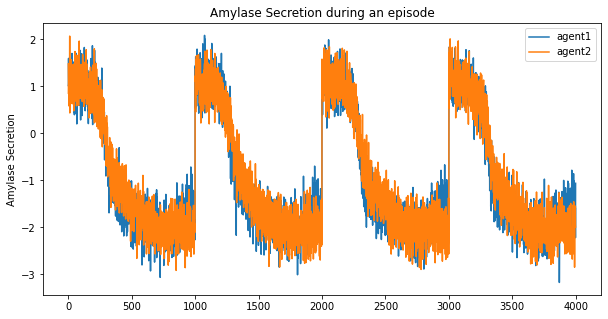

In [109]:
batch_acts["agent1"]=batch_acts["agent1"].detach().numpy().flatten()
batch_acts["agent2"]=batch_acts["agent2"].detach().numpy().flatten()
pd.DataFrame(batch_acts).plot(ylabel="Amylase Secretion",title="Amylase Secretion during an episode",figsize=(10,5))

In [136]:
agents=env.agents
states=torch.rand((10000,5))
states[:,0]=states[:,0]*10
states[:,1]=states[:,1]*10
states[:,2]=states[:,2]*100
states[:,3]=states[:,3]*10
states[:,4]=990
amy1=agents[0].actor_network_(states)
amy2=agents[1].actor_network_(states)
states=torch.concat([states,amy1,amy2],dim=1)
states=states.detach().numpy()
states=pd.DataFrame(states,columns=["agent1","agent2","Glucose","Starch","Time","Amylase_Secretion_1","Amylase_Secretion_2"])

<AxesSubplot:>

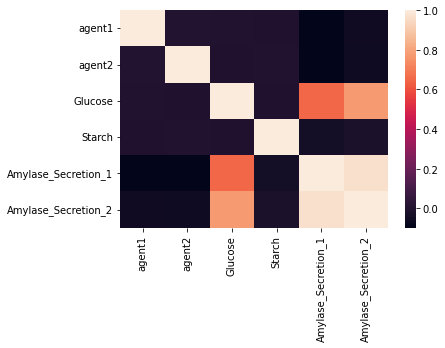

In [137]:
sns.heatmap(states[["agent1","agent2","Glucose","Starch","Amylase_Secretion_1","Amylase_Secretion_2"]].corr())

In [138]:
fig=px.scatter_3d(states,x="Glucose",y="agent2",z="Amylase_Secretion_1",color="Amylase_Secretion_1")
fig.update_traces(marker=dict(size=2,))
fig.show()

In [140]:
fig=px.scatter_3d(states,x="Glucose",y="agent1",z="Amylase_Secretion_2",color="Amylase_Secretion_2")
fig.update_traces(marker=dict(size=2,))
fig.show()

In [142]:
observables=batch_obs[agent.name].detach().numpy()
observables=pd.DataFrame(observables[:,:-1],columns=["agent1","agent2","Glucose","Starch"])

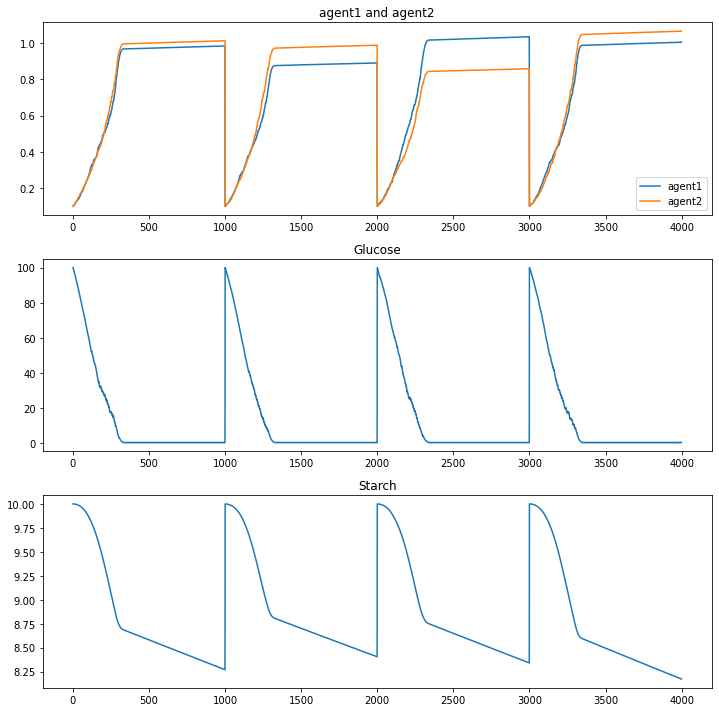

In [145]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 10))

observables[["agent1","agent2"]].plot(ax=axes[0],title="agent1 and agent2")
observables["Glucose"].plot(ax=axes[1],title="Glucose")
observables["Starch"].plot(ax=axes[2],title="Starch")
plt.tight_layout()